In [1]:
import numpy as np
from numpy import random as rnd
import Functions as func
import matplotlib.pyplot as plt
import matplotlib as mpl

# To do
- Integrate with matrix
- create a fetch date from voxel function

# Questions for Stefano
- Is the random number the same for the whole loop?
- anisoropy for the different tissues?
    Saw in a CalTech pres that it was 0.9 for most biological tissues, so we'll use that

In [2]:
#Variables to be declared in the beginning
#for the source
point = np.array([10, -3, 9]) #The coordinate in space where the source is Should be a numpy array
vector = np.array([1, 1, 1]) #direction the source is pointing, should be a numpy array

#scalingFactor to go from units of cm to 0.33mm
scaleFactor = 1 / (0.33*10**(-1))

#Materials info for VIS excitation (wavelength 488nm)
visExSkin = {'u_a' : 6.0, 'u_s' : 625, 'n' : 1.37}
visExfat = {'u_a' : 6.0, 'u_s' : 310, 'n' : 1.45}
visExDuct = {'u_a' : 0.2, 'u_s' : 317, 'n' : 1.42}
cvisExCancer = {'u_a' : 1.0, 'u_s' : 300, 'n' : 1.45}

#Materials info for NIR excitation (wavelength 488nm)
nirExSkin = {'u_a' : 2.0, 'u_s' : 241, 'n' : 1.37}
nirExFat = {'u_a' : 1.4, 'u_s' : 136, 'n' : 1.45}
nirExDuct = {'u_a' : 0.2, 'u_s' : 169, 'n' : 1.42}
nirExCancer = {'u_a' : 1.0, 'u_s' : 150, 'n' : 1.45}

In [3]:
#step 1, generate starting position
pointOnPlane = func.pointOnPlane(point, vector)
print(pointOnPlane)

[1.13189427 1.09423807 0.8848635 ]


In [4]:
#step 2, generate a photon with the given start position and direction
photon = func.PhotonClass(1, pointOnPlane, vector)
print(photon.position, photon.direction, photon.weight)

[1.13189427 1.09423807 0.8848635 ] [0.57735027 0.57735027 0.57735027] 1


In [5]:
#step 3, determine stepSize (assuming we're in skin)
step = func.determineStepSize(visExSkin['u_a'] + visExSkin['u_s'], scaleFactor)
print(step)

0.00679949179713352


In [6]:
#step 4, Move the photon
photon.movePhoton(step)
print(photon.position)

[1.13581996 1.09816376 0.88878919]


In [7]:
#step 5, remove weight from photon
photon.removeWeight(visExSkin['u_a'], visExSkin['u_s'])
print(photon.weight)

0.9904912836767037


In [8]:
#step 6, Scatter the photon
photon.scatterPhoton()
print(photon.direction)

[0.58412081 0.58551171 0.56212001]


## Now as a loop

In [9]:
path = []

pointOnPlane = func.pointOnPlane(point, vector)
photon = func.PhotonClass(1, pointOnPlane, vector)

while photon.weight > 0.01:
    path.append(photon.position)
    step = func.determineStepSize(nirExFat['u_a'] + nirExFat['u_s'], scaleFactor)
    photon.movePhoton(step)
    photon.removeWeight(nirExFat['u_a'], nirExFat['u_s'])
    photon.scatterPhoton()
    
path = np.array(path)

In [10]:
path

array([[  1.13887607,   0.96135015,   0.83280997],
       [  1.15516439,   0.97763846,   0.84909829],
       [  1.18174575,   1.00455357,   0.883637  ],
       ...,
       [-13.6037404 , -18.93822365,  17.0039369 ],
       [-13.66718273, -19.13351429,  17.04084998],
       [-13.66511955, -19.16885876,  17.04054271]])

In [11]:
#end to end distance of phton path
print(sum((path[0] - path[-1])**(2))**(1/2), "steps:", len(path))


29.783790848839445 steps: 450


<IPython.core.display.Javascript object>


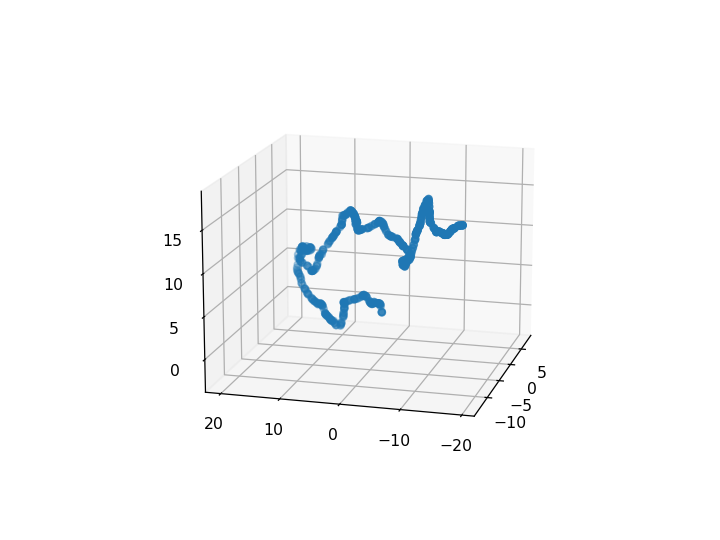

In [12]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(path[:,0], path[:,1], path[:, 2])